# Importing the data, plotting for confirmation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [3]:
n2pixel1 = np.loadtxt('N2-pixel-1.txt', delimiter='\t')
n2pixel2 = np.loadtxt('N2-Pixel-2.txt', delimiter='\t')
n2pixel3 = np.loadtxt('N2-pixel-3.txt', delimiter='\t')
nepixel1 = np.loadtxt('Ne-pixel-1.txt', delimiter='\t')
nepixel2 = np.loadtxt('Ne-pixel-2.txt', delimiter='\t')
nepixel3 = np.loadtxt('Ne-pixel-3.txt', delimiter='\t')

hydrogen = np.loadtxt('hydrogen.txt', delimiter='\t')
oxygen = np.loadtxt('oxygen.txt', delimiter='\t')
water = np.loadtxt('water.txt', delimiter='\t')

sun = np.loadtxt('Sun2.txt', delimiter='\t')
bluesky = np.loadtxt('bluesky.txt', delimiter='\t')
haze2 = np.loadtxt('hazeprt2.txt', delimiter='\t')

sunset1 = np.loadtxt('sunset1.txt', delimiter='\t')
sunset2 = np.loadtxt('sunset2.txt', delimiter='\t')
sunset3 = np.loadtxt('sunset3.txt', delimiter='\t')
sunset4 = np.loadtxt('sunset4.txt', delimiter='\t')
sunset5 = np.loadtxt('sunset5.txt', delimiter='\t')

night1 = np.loadtxt('sunsetNew1.txt', delimiter='\t')
night2 = np.loadtxt('sunsetNew2.txt', delimiter='\t')
night3 = np.loadtxt('sunsetNew3.txt', delimiter='\t')
night4 = np.loadtxt('sunsetNew4.txt', delimiter='\t')
night5 = np.loadtxt('sunsetNew5.txt', delimiter='\t')

dark = np.loadtxt('darkframe.txt', delimiter='\t')

Text(0, 0.5, 'Relative Intensity')

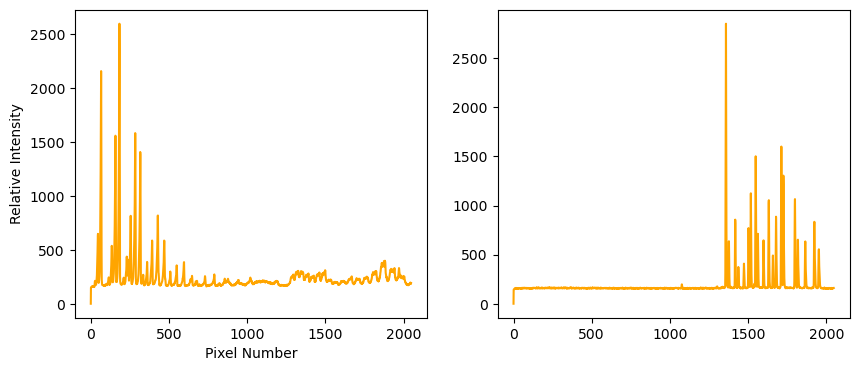

In [4]:
fig, ax = plt.subplots(1,2,figsize=[10,4])

ax[0].plot(n2pixel1[:,1],'orange')
ax[1].plot(nepixel1[:,1],'orange')

ax[0].set_xlabel("Pixel Number")
ax[0].set_ylabel("Relative Intensity")

# Average of all three datasets

In [5]:
avgn2 = []
avgne = []
for i in range(0,len(n2pixel1)):
    meann2 = (n2pixel1[i,1] + n2pixel2[i,1] + n2pixel1[i,1]) / 3
    avgn2.append(meann2)
    meanne = (nepixel1[i,1] + nepixel2[i,1] + nepixel1[i,1]) / 3
    avgne.append(meanne)

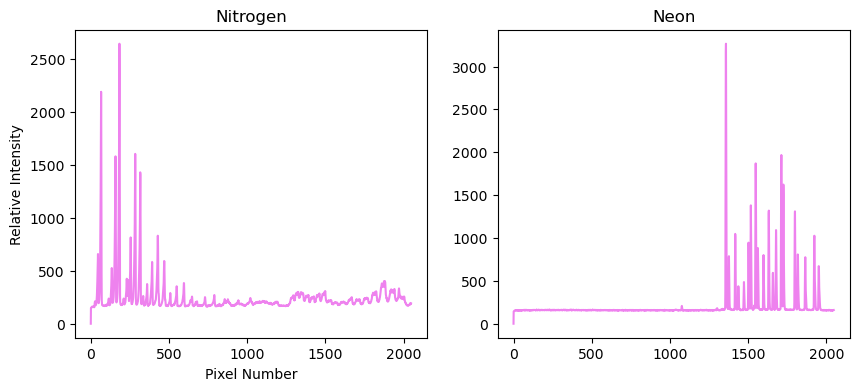

In [6]:
fig, ax = plt.subplots(1,2,figsize=[10,4])

ax[0].plot(avgn2,'violet')
ax[1].plot(avgne,'violet')

ax[0].set_xlabel("Pixel Number")
ax[0].set_ylabel("Relative Intensity")
ax[0].set_title("Nitrogen")
ax[1].set_title("Neon")

plt.savefig("pixelnitroneon.png")

# Finding Peaks, Compare to List, Replot only with Important Peaks

[  46   66  134  158  183  230  240  255  284  316  392  428  469 1874
 1880]
{'peak_heights': array([ 658.33333333, 2191.33333333,  526.        , 1581.33333333,
       2645.66666667,  425.        ,  411.66666667,  815.33333333,
       1604.66666667, 1430.33333333,  583.33333333,  831.33333333,
        592.66666667,  401.66666667,  402.66666667])}


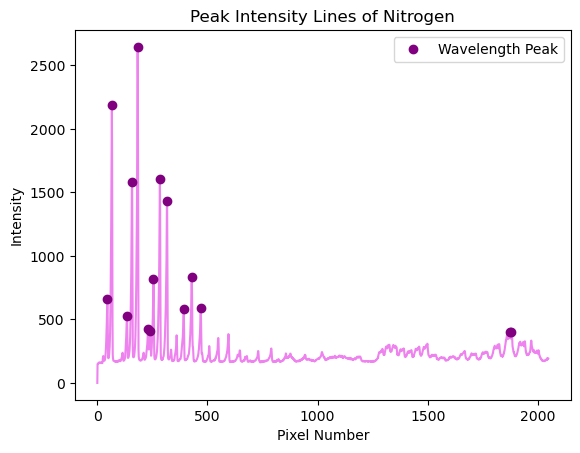

In [7]:
peaksn2, propertiesn2 = find_peaks(x=avgn2, height = 400)
print(peaksn2)
print(propertiesn2)

plt.plot(avgn2, "violet")
plt.plot(peaksn2,propertiesn2["peak_heights"],'o', color = "purple", label="Wavelength Peak")
plt.title("Peak Intensity Lines of Nitrogen")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity")
plt.legend()

[1076 1358 1377 1417 1437 1473 1502 1517 1539 1548 1562 1598 1632 1658
 1678 1712 1725 1799 1817 1865 1923 1951]
{'peak_heights': array([ 207.33333333, 3265.66666667,  787.33333333, 1047.33333333,
        436.66666667,  486.        ,  945.33333333, 1380.33333333,
        213.        , 1869.66666667,  882.        ,  800.66666667,
       1319.        ,  593.        , 1092.        , 1967.33333333,
       1622.66666667, 1310.33333333,  807.66666667,  775.33333333,
       1026.        ,  671.33333333])}


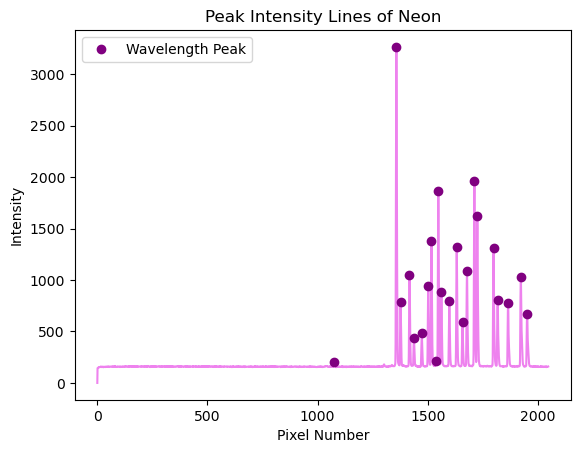

In [8]:
peaksne, propertiesne = find_peaks(x=avgne, height = 200)
print(peaksne)
print(propertiesne)

plt.plot(avgne, "violet")
plt.plot(peaksne,propertiesne["peak_heights"],'o',color = "purple",label="Wavelength Peak")
plt.title("Peak Intensity Lines of Neon")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity")
plt.legend()

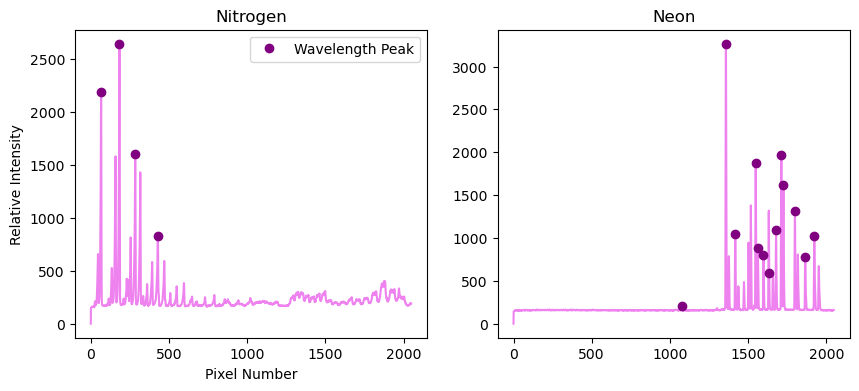

In [27]:
fig, ax = plt.subplots(1,2,figsize=[10,4])

ourpixelnitro = ourpixel[ourpixel <= 500]
intensity_nitro = peakheight[:len(ourpixelnitro)]
ax[0].plot(avgn2,'violet')
ax[1].plot(avgne,'violet')
ax[0].plot(ourpixelnitro,intensity_nitro,'o', color = 'purple',label="Wavelength Peak")
ax[0].legend()
ax[1].plot(ourpixel[ourpixel>=500],peakheight[len(ourpixelnitro):],'o', color = 'purple' )
ax[0].set_xlabel("Pixel Number")
ax[0].set_ylabel("Relative Intensity")
ax[0].set_title("Nitrogen")
ax[1].set_title("Neon")

plt.savefig("peaksnitroneon.png")

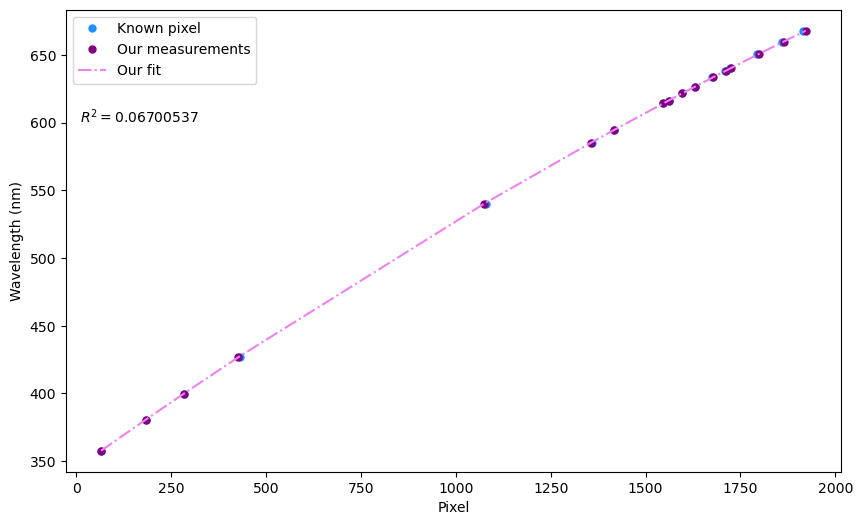

In [10]:
knownpixel = np.array([65,182, 283, 430, 1078.5, 1358.6, 1417.8, 1547.1,1560.6, 1596.4, 1629.5,1675.4,1708.6,1721.7,1794.0,1858.8,1915.1]) ##from datatable in manual 
ourpixel = np.array([65, 182, 283, 427, 1075, 1357, 1416, 1547, 1561, 1597, 1631,1677,1711,1724,1798,1864,1922]) ##from find peaks shifted by one to account for ZERO pixel in my data
wavelength = np.array([357.69, 380.49, 399.84, 426.97, 540.05618, 585.24879, 594.48342, 614.30626, 616.35939, 621.72812,626.6495,633.44278,638.29917,640.2248,650.65281, 659.89529, 667.82762 ]) ##in nm
peakheight = np.array([2191.33333333,2645.66666667,1604.66666667,831.33333333,207.33333333,3265.66666667,1047.33333333,1869.66666667,882,800.66666667,593,1092,1967.33333333,1622.66666667,1310.33333333,775.33333333,1026])

coeff = np.polyfit(ourpixel,wavelength,3, cov=True)
fit = coeff[0][3] + coeff[0][2]*ourpixel + coeff[0][1]*ourpixel**2 +coeff[0][0]*ourpixel**3
actual = 344.311 + 0.19743*knownpixel - 1.49*10**(-5)*knownpixel**2 





plt.figure(figsize = [10,6])
plt.plot(knownpixel, wavelength, "o", color = "dodgerblue", label ="Known pixel", markersize = 5)
plt.plot(ourpixel,wavelength,"o", color = "purple", label = "Our measurements", markersize = 5)
plt.xlabel("Pixel")
plt.ylabel("Wavelength (nm)")
plt.text(10,600,"$R^2=$" + str(0.06700537))

plt.plot(ourpixel, fit, "-.",color = "violet",label = "Our fit")
#plt.plot(knownpixel, actual, "-.", label = "Manufacturer")
plt.legend()
plt.savefig("calibrationfit.png")
plt.legend()

In [11]:
coeff

(array([-1.84074797e-10, -1.55438025e-05,  1.98619152e-01,  3.44879727e+02]),
 array([[ 2.09707897e-20, -6.71066205e-17,  5.81714125e-14,
         -8.83081633e-12],
        [-6.71066205e-17,  2.20110387e-13, -1.96696036e-10,
          3.09251560e-08],
        [ 5.81714125e-14, -1.96696036e-10,  1.82888012e-07,
         -3.07680049e-05],
        [-8.83081633e-12,  3.09251560e-08, -3.07680049e-05,
          6.67389040e-03]]))

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['','Manufacturer', 'Fitted', "Variance (Standard Deviation)"]),
                 cells=dict(values=[['$a_0$','$a_1$','$a_2$','$a_3$'],["$344.311$", "$0.19743$","$-1.49\cdot 10^{-5}$" , "$0.0$"], ["$344.880$", "$0.19861$", "$-1.55\cdot 10^{-5}$", "$-1.84\cdot 10^{-10}$"],[coeff[1][3][3],coeff[1][2][2],coeff[1][1][1],coeff[1][0][0]]]))
                     ])
fig.show()


(array([ 4.20508641e-06, -3.03255942e-03,  5.67782658e+00, -1.77088728e+03]), array([7.37640133]), 4, array([1.97780647e+00, 2.96479385e-01, 1.95181298e-02, 7.52225278e-04]), 3.774758283725532e-15)


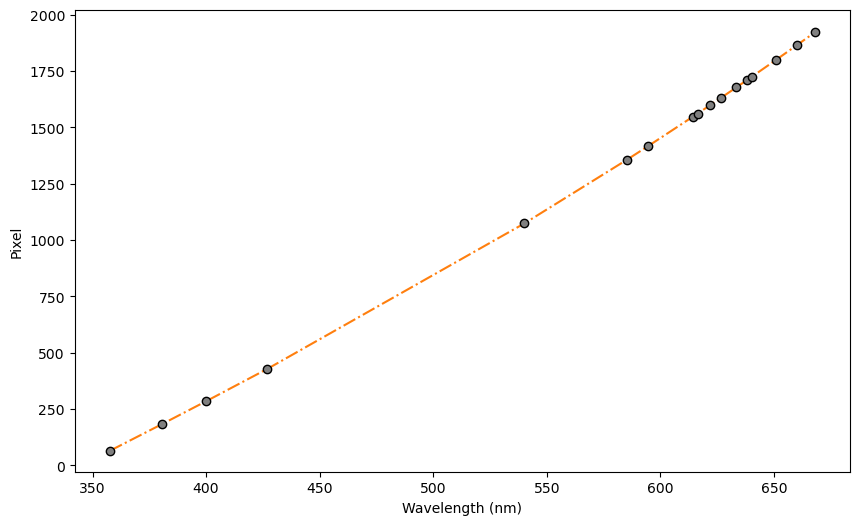

In [13]:

coeff_test = np.polyfit(wavelength,ourpixel,3, full = True)

datastyle = dict(mec='k', linestyle='none',
                 ecolor='k', marker='o', 
                 mfc='gray', label='data',
                 alpha=1,elinewidth=1,capsize=2)

fit_test = coeff_test[0][3] + coeff_test[0][2]*wavelength + coeff_test[0][1]*wavelength**2 + coeff_test[0][0]*wavelength**3


plt.figure(figsize = [10,6])

plt.ylabel("Pixel")
plt.xlabel("Wavelength (nm)")

plt.errorbar(wavelength, ourpixel, abs(ourpixel-knownpixel), **datastyle)
plt.plot(wavelength, fit_test, "-.",label = "Our fit")

print(coeff_test)

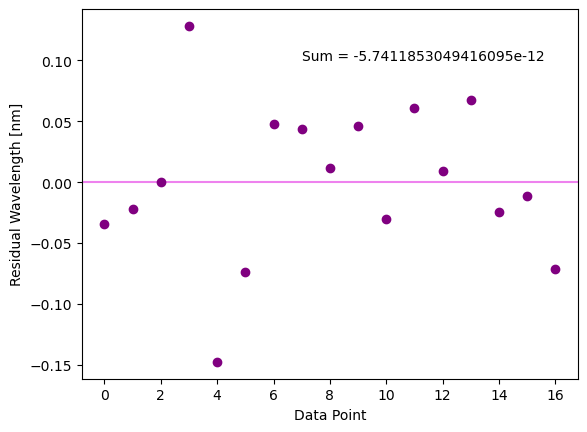

In [14]:
plt.axhline(y = 0, xmin = 0, xmax = 16,color='violet')
plt.plot(wavelength-fit,"o",color='purple')
#plt.title("Residuals")
plt.xlabel("Data Point")
plt.ylabel("Residual Wavelength [nm]")
plt.text(7,0.1,"Sum = " + str(np.sum(wavelength-fit)))

plt.savefig("residuals.png")

In [15]:
def fit(pixel):
    fit = coeff[0][3] + float(coeff[0][2])*pixel + float(coeff[0][1])*pixel**2 +float(coeff[0][0])*pixel**3
    return fit

def actual(pixel):
    fit = 344.311 + 0.49743*pixel + (-1.49*10**(-5))*pixel**2
    return fit

def uncertainty(pixel):
    return coeff[1][3][3] + float(coeff[1][2][2])*pixel + float(coeff[1][1][1])*pixel**2 + float(coeff[1][0][0])*pixel**3
    
#plt.figure(figsize=[10,4])
#plt.plot(fit(n2pixel1[:,0]),n2pixel2[:,1],color="violet")

# WHERE ARE PEAKS IN HYDROGEN WATER AND OXYGEN

In [16]:
peaksh, propertiesh = find_peaks(x=hydrogen[:,1], height = 1100)
        
peakso, propertieso = find_peaks(x=oxygen[:,1], height = 1100)



[ 219  282  289  302  307  323  330  332  345  374  381  391  396  405
  450  468  497  502  509  511  519  527  533  538  540  542  545  550
  555  562  564  570  574  585  587  589  594  600  621  623  629  642
  646  651  658  674  679  692  705  715  721  728  731  735  737  743
  745  752  759  765  774  776  779  785  800  813  823  837  846  855
  862  870  878  886  904  916  918  920  923  930  932  940  942  948
  954  964  972  978  981  985  994  997 1005 1009 1017 1026 1037 1049
 1054 1059 1068 1076 1088 1097 1112 1125 1135 1140 1148 1150 1160 1167
 1169 1197 1206 1213 1219 1234 1243 1254 1263 1269 1284 1298 1308 1315
 1333 1347 1356 1369 1380 1389 1394 1399 1404 1409 1413 1420 1427 1429
 1437 1447 1456 1466 1472 1483 1488 1498 1506 1517 1534 1543 1554 1561
 1569 1574 1586 1603 1612 1637 1644 1654 1673 1838]
[ 400.  476.  405.  405.  406.  599.  432.  431.  401.  432.  642.  466.
  568.  458.  415.  439.  403.  407.  519.  503.  400.  507.  496.  426.
  419.  413.  434.  5

Text(0.5, 1.0, 'Hydrogen')

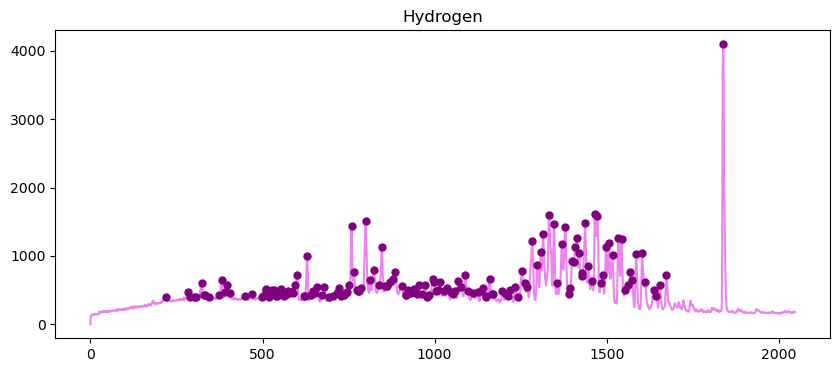

In [17]:
peaksh, propertiesh = find_peaks(x=hydrogen[:,1], height = 400)
filterpeaksh = np.array([323, 381, 600, 629, 759, 800, 846, 1284, 1333,1347,  1380, 1437, 1466, 1673 ,1838])
filterpeaksh.astype(int)
filterpropertiesh = [599, 642, 718, 997, 1440, 1505, 1125, 1212, 1602, 1468, 1421, 1480, 1620,727, 4095  ]

peakso, propertieso = find_peaks(x=oxygen[:,1], height = 1000)
filterpeakso = np.array([561, 742, 952, 1203,1453,1760 ])
filterpeakso.astype(int)
filterpropertieso = [1522, 2990, 4095, 2969,1571,1189]

peaksw, propertiesw = find_peaks(x=water[:,1], height = 1500)
filterpeaksw = np.array([351, 561, 742, 952, 985, 1201, 1453, 1558, 1760])
filterpeaksw.astype(int)
filterpropertiesw = [1372, 1295, 2318, 3137, 1910, 2774, 1956, 2049, 1546]

print(peaksh)
print(propertiesh["peak_heights"])
plt.figure(figsize=[10,4])
plt.plot(hydrogen[:,0],hydrogen[:,1],color="violet")
plt.plot(peaksh,propertiesh["peak_heights"],'o',color = "purple",markersize = 5, label="Wavelength Peak")
#plt.plot(filterpeakso,filterpropertieso,'o',color = "purple",markersize = 5, label="Wavelength Peak")

plt.title("Hydrogen")



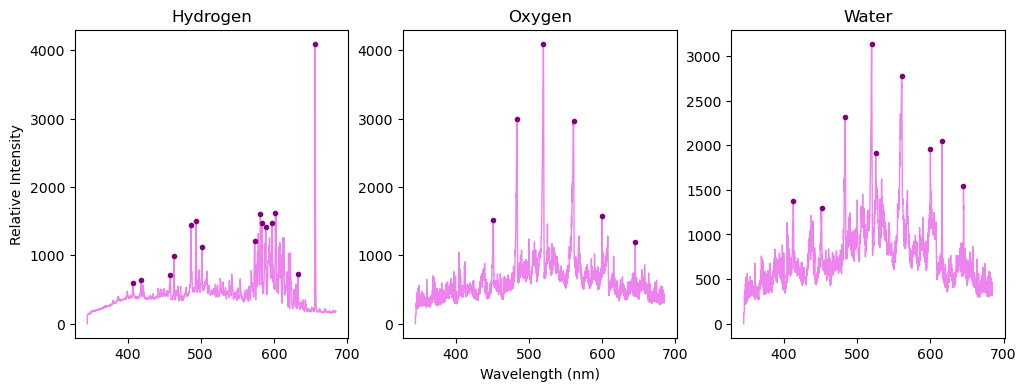

In [18]:

fig, ax = plt.subplots(1,3,figsize=[12,4])
ax[0].plot(fit(hydrogen[:,0]),hydrogen[:,1],color="violet", linewidth =1)
ax[0].plot(fit(filterpeaksh),filterpropertiesh,'o',color = "purple",label="Wavelength Peak",markersize= 3)
ax[0].set_title("Hydrogen")
ax[0].set_ylabel("Relative Intensity")
ax[1].plot(fit(oxygen[:,0]),oxygen[:,1],color="violet", linewidth =1)
ax[1].plot(fit(filterpeakso),filterpropertieso,'o',color = "purple",label="Wavelength Peak",markersize= 3)
ax[1].set_xlabel("Wavelength (nm)")
ax[1].set_title("Oxygen")
#ax[0].vlines(410,0,4000,alpha = 0.2)


ax[2].plot(fit(water[:,0]),water[:,1],color="violet",linewidth =1)
ax[2].plot(fit(filterpeaksw),filterpropertiesw,'o',color = "purple",label="Wavelength Peak",markersize= 3)
ax[2].set_title("Water")

plt.savefig("hydoxywater.png")

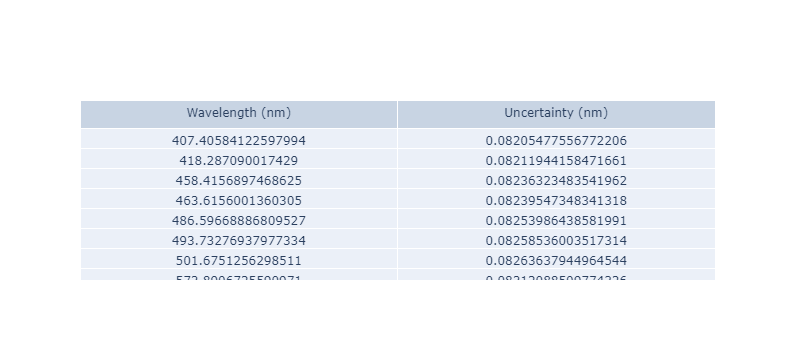

In [19]:
##HYDROGEN NEED TO FIX

fith = fit(filterpeaksh)
errh = np.sqrt(uncertainty(filterpeaksh))
fig = go.Figure(data=[go.Table(header=dict(values=['Wavelength (nm)','Uncertainty (nm)']),
                 cells=dict(values=[[fith[0],fith[1],fith[2],fith[3],fith[4],fith[5],fith[6],fith[7],fith[8],fith[9],fith[10],fith[11],fith[12],fith[13],fith[14]],
                                    [errh[0],errh[1],errh[2],errh[3],errh[4],errh[5],errh[6],errh[7],errh[8],errh[9],errh[10],errh[11],errh[12],errh[13],errh[14],]]))
                     ])
fig.show()

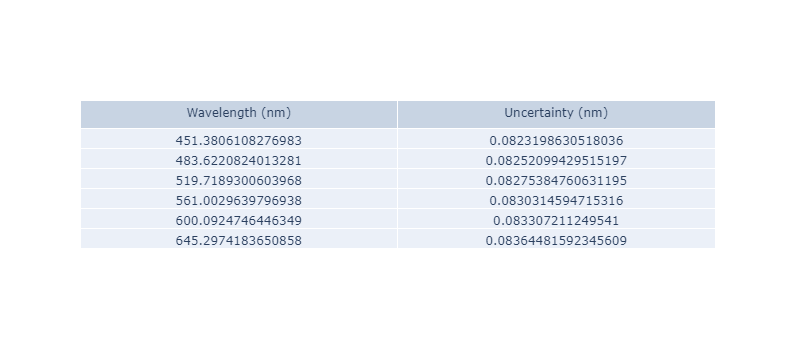

In [20]:
##O
fito = fit(filterpeakso)
erro = np.sqrt(uncertainty(filterpeakso))
fig = go.Figure(data=[go.Table(header=dict(values=['Wavelength (nm)','Uncertainty (nm)']),
                 cells=dict(values=[[fito[0],fito[1],fito[2],fito[3],fito[4],fito[5]],
                                    [erro[0],erro[1],erro[2],erro[3],erro[4],erro[5]]]))
                     ])
fig.show()

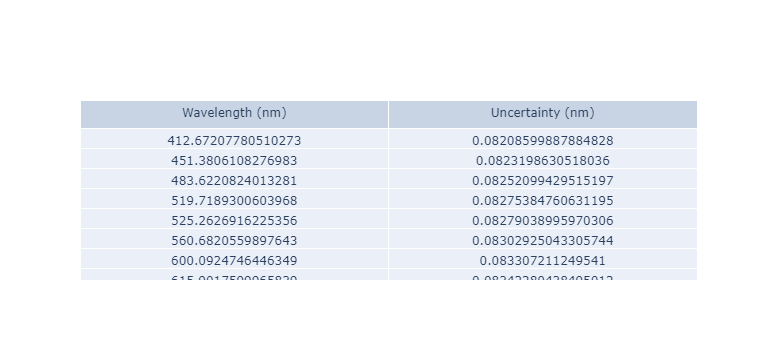

In [21]:
##WATER

fitw = fit(filterpeaksw)
errw = np.sqrt(uncertainty(filterpeaksw))
fig = go.Figure(data=[go.Table(header=dict(values=['Wavelength (nm)','Uncertainty (nm)']),
                 cells=dict(values=[[fitw[0],fitw[1],fitw[2],fitw[3],fitw[4],fitw[5],fitw[6],fitw[7],fitw[8]],
                                    [errw[0],errw[1],errw[2],errw[3],errw[4],errw[5],errw[6],errw[7],errw[8]]]))
                     ])
fig.show()

[ 561  742  952 1203 1453 1760]


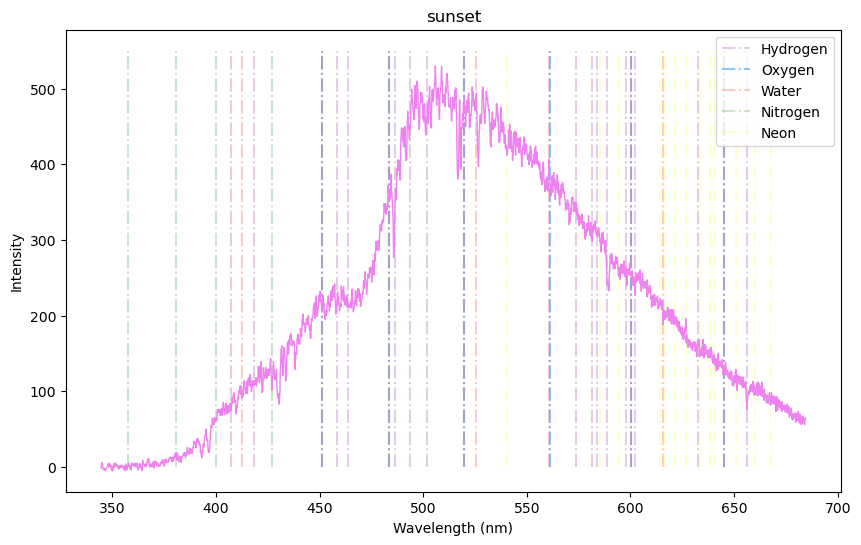

In [28]:
print(filterpeakso)

plt.figure(figsize=[10,6])

plt.vlines(fit(filterpeaksh),0, 550,color = 'purple', linestyle = '-.',alpha = 0.2, label = "Hydrogen" )
plt.vlines(fit(filterpeakso),0,550,color = 'dodgerblue', linestyle = '-.',alpha = 0.5, label = "Oxygen" )
plt.vlines(fit(filterpeaksw),0,550,color = 'red', linestyle = '-.',alpha = 0.2, label = "Water" )
plt.vlines(fit(ourpixelnitro),0,550,color = 'green', linestyle = '-.',alpha = 0.2, label = "Nitrogen" )
plt.vlines(fit(ourpixel[ourpixel >= 500]),0,550,color = 'yellow', linestyle = '-.',alpha = 0.2, label = "Neon" )

#plt.vlines(fit(h_absorb),0, 550,color = 'purple', linestyle = '-.',alpha = 0.2, label = "Hydrogen" )
#plt.vlines(fit(o_absorb),0,550,color = 'dodgerblue', linestyle = '-.',alpha = 0.2, label = "Oxygen" )

plt.plot(bluesky[1:,0],bluesky[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.legend()

plt.title("sunset")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")


h_absorb = np.array([759, 1380, 1838])
o_absorb = np.array([1760])
w_absorb = np.array([])

plt.savefig("blueskytotal.png")

In [51]:
np.sqrt(uncertainty(fit(427)))

0.08217052228899424

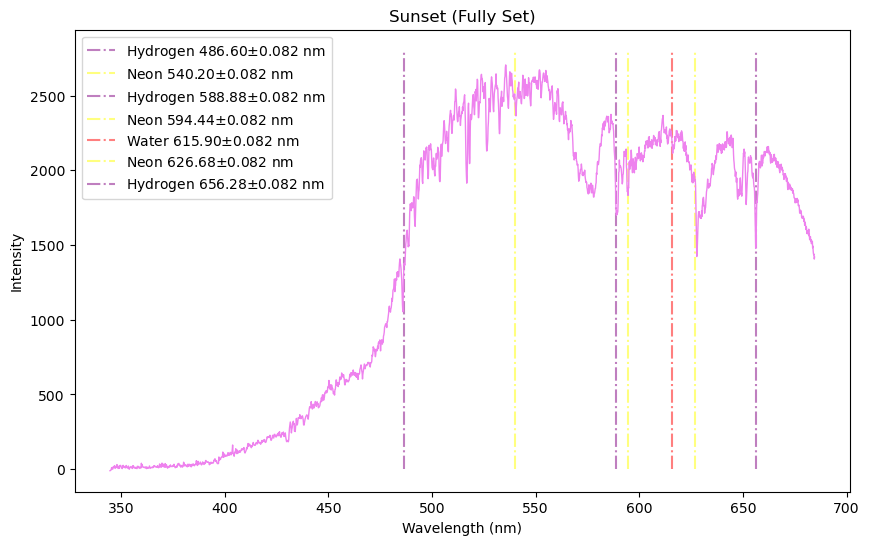

In [52]:
plt.figure(figsize=[10,6])

plt.vlines(fit(759),0, 2800,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 486.60$\pm$0.082 nm" )
plt.vlines(fit(1075),0, 2800,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 540.20$\pm$0.082 nm" )
plt.vlines(fit(1380),0, 2800,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 588.88$\pm$0.082 nm" )
plt.vlines(fit(1416),0, 2800,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 594.44$\pm$0.082 nm" )
plt.vlines(fit(1558),0, 2800,color = 'red', linestyle = '-.',alpha = 0.5, label = "Water 615.90$\pm$0.082 nm" )
plt.vlines(626.67989821, 0, 2800, color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 626.68$\pm$0.082 nm" )
plt.vlines(fit(1838),0, 2800,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 656.28$\pm$0.082 nm" )

plt.legend()
plt.plot(night4[1:,0],night4[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.title("Sunset (Fully Set)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")

plt.savefig("sunsetfully.png")

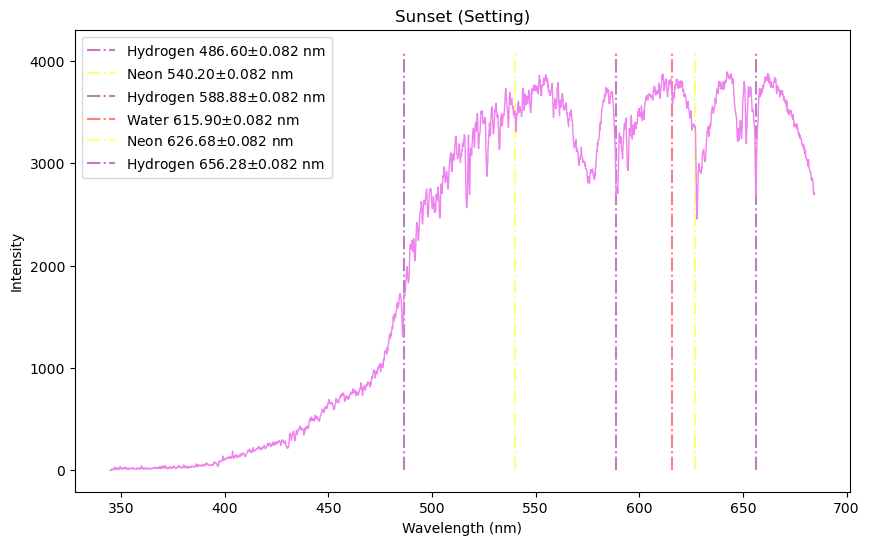

In [53]:
plt.figure(figsize=[10,6])


plt.vlines(fit(759),0, 4100,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 486.60$\pm$0.082 nm" )
plt.vlines(fit(1075),0, 4100,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 540.20$\pm$0.082 nm" )
plt.vlines(fit(1380),0, 4100,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 588.88$\pm$0.082 nm" )
plt.vlines(fit(1558),0, 4100,color = 'red', linestyle = '-.',alpha = 0.5, label = "Water 615.90$\pm$0.082 nm" )
plt.vlines(626.67989821, 0, 4100, color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 626.68$\pm$0.082 nm" )
plt.vlines(fit(1838),0, 4100,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 656.28$\pm$0.082 nm" )


plt.legend()
plt.plot(sunset4[1:,0],sunset4[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.title("Sunset (Setting)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")

plt.savefig("sunset.png")

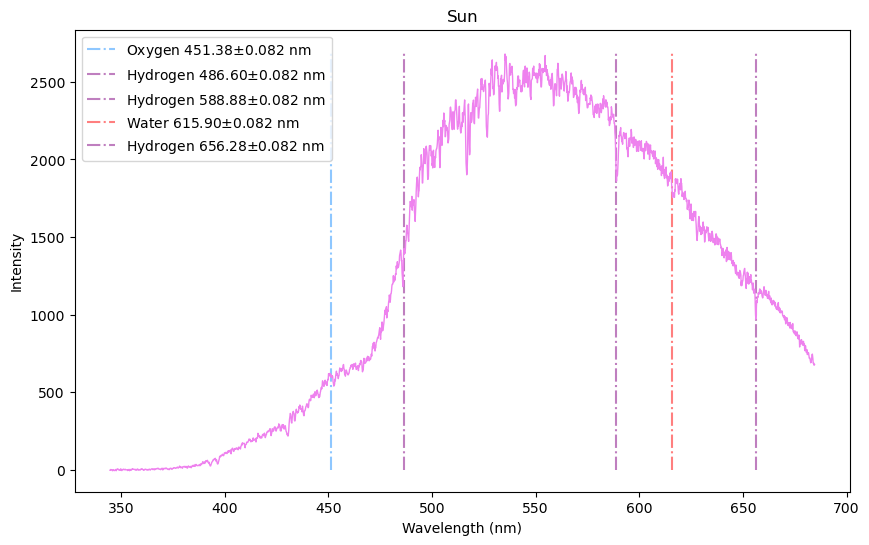

In [54]:
plt.figure(figsize=[10,6])

plt.vlines(fit(561),0, 2700,color = 'dodgerblue', linestyle = '-.',alpha = 0.5, label = "Oxygen 451.38$\pm$0.082 nm" )
plt.vlines(fit(759),0, 2700,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 486.60$\pm$0.082 nm" )
plt.vlines(fit(1380),0, 2700,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 588.88$\pm$0.082 nm" )
plt.vlines(fit(1558),0, 2700,color = 'red', linestyle = '-.',alpha = 0.5, label = "Water 615.90$\pm$0.082 nm" )
plt.vlines(fit(1838),0, 2700,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 656.28$\pm$0.082 nm" )

plt.legend()
plt.plot(sun[1:,0],sun[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.title("Sun")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")

plt.savefig("sun.png")

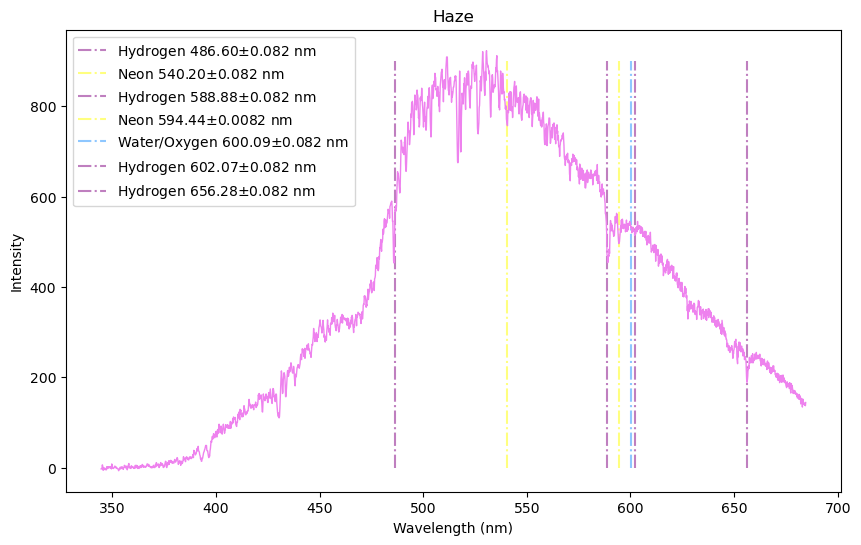

In [55]:
plt.figure(figsize=[10,6])

#plt.vlines(fit(filterpeaksh),0, 900,color = 'purple', linestyle = '-.',alpha = 0.2, label = "Hydrogen" )
#plt.vlines(fit(filterpeakso),0,900,color = 'dodgerblue', linestyle = '-.',alpha = 0.2, label = "Oxygen" )
#plt.vlines(fit(filterpeaksw),0,900,color = 'red', linestyle = '-.',alpha = 0.2, label = "Water" )
#plt.vlines(fit(ourpixelnitro),0,900,color = 'green', linestyle = '-.',alpha = 0.2, label = "Nitrogen" )
#plt.vlines(fit(ourpixel[ourpixel >= 500]),0,900,color = 'yellow', linestyle = '-.',alpha = 0.2, label = "Neon" )

plt.vlines(fit(759),0, 900,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 486.60$\pm$0.082 nm" )
plt.vlines(fit(1075),0, 900,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 540.20$\pm$0.082 nm" )
plt.vlines(fit(1380),0, 900,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 588.88$\pm$0.082 nm" )
plt.vlines(fit(1416),0, 900,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 594.44$\pm$0.0082 nm" )
plt.vlines(fit(1453),0, 900,color = 'dodgerblue', linestyle = '-.',alpha = 0.5, label = "Water/Oxygen 600.09$\pm$0.082 nm" )
plt.vlines(fit(1466),0, 900,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 602.07$\pm$0.082 nm" )
plt.vlines(fit(1838),0, 900,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 656.28$\pm$0.082 nm" )



plt.legend()
plt.plot(haze2[1:,0],haze2[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.title("Haze")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")

plt.savefig("haze.png")

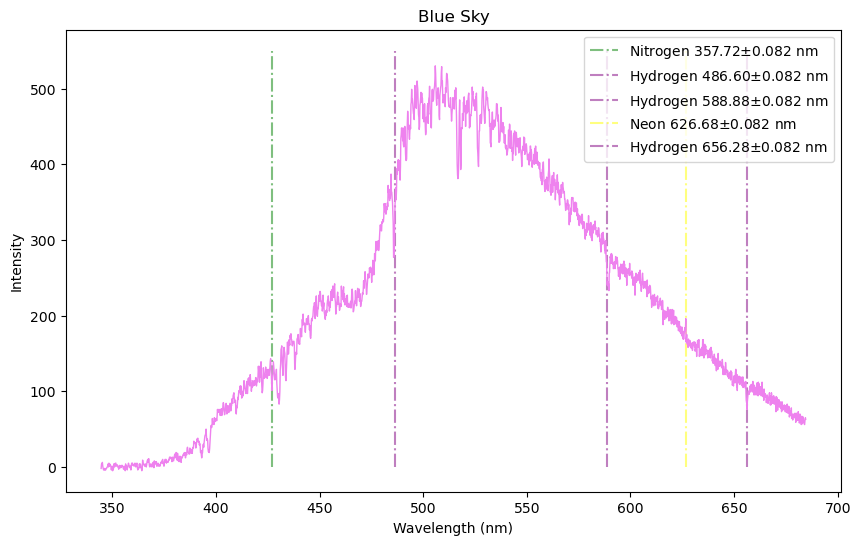

In [56]:
plt.figure(figsize=[10,6])

plt.vlines(fit(427),0, 550,color = 'green', linestyle = '-.',alpha = 0.5, label = "Nitrogen 357.72$\pm$0.082 nm" )
plt.vlines(fit(759),0, 550,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 486.60$\pm$0.082 nm" )
plt.vlines(fit(1380),0, 550,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 588.88$\pm$0.082 nm" )
plt.vlines(fit(1631 ),0, 550,color = 'yellow', linestyle = '-.',alpha = 0.5, label = "Neon 626.68$\pm$0.082 nm" )
plt.vlines(fit(1838),0, 550,color = 'purple', linestyle = '-.',alpha = 0.5, label = "Hydrogen 656.28$\pm$0.082 nm" )


plt.legend()
plt.plot(bluesky[1:,0],bluesky[1:,1]-dark[1:,1],color="violet",linewidth = 1)
plt.title("Blue Sky")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")

plt.savefig("bluesky.png")

In [62]:
def powerlaw (x, a, b ):
    return a * x ** b

In [74]:
normalsun = sun[1:,1]/sum(sun[1:,1])
normalbluesky = bluesky[1:,1]/sum(bluesky[1:,1])
normalsunset = sunset4[1:,1]/sum(sunset4[1:,1])
normalnight = night4[1:,1]/sum(night4[1:,1])


ratiosun_sunset = normalsun/normalsunset
ratiosun_night = normalsun/normalnight

In [77]:
fit_sun_sunset = curve_fit(powerlaw, sun[1:,0], ratiosun_sunset)
fit_sun_night = curve_fit(powerlaw, sun[1:,0], ratiosun_night)

print(fit_sun_night)

(array([22.84678189, -0.49607939]), array([[ 6.16650798e+00, -4.34500037e-02],
       [-4.34500037e-02,  3.06470788e-04]]))


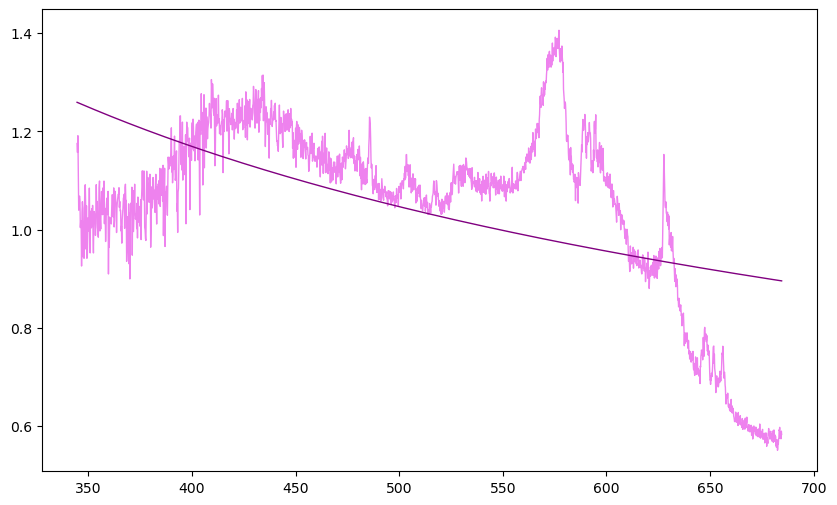

In [76]:
plt.figure(figsize=[10,6])


plt.plot(bluesky[1:,0], ratiosun_night, color="violet",linewidth = 1)
plt.plot(bluesky[1:,0],powerlaw(bluesky[1:,0],fit_sun_night[0][0], fit_sun_night[0][1] ),color="purple",linewidth = 1)



In [35]:
np.sqrt(uncertainty(fit(427)))

0.08217052228899424